In [94]:
import pandas as pd
import matplotlib.pyplot as plt
import pm4py
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

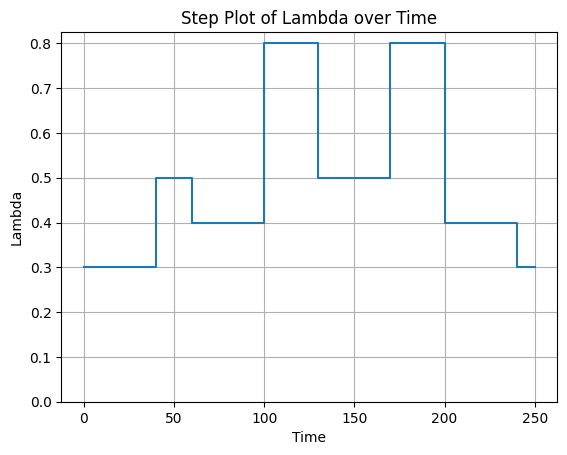

In [95]:
[(40, 0.3), (60, 0.5), (100, 0.4), (130, 0.8), (170, 0.5), (200, 0.8), (240, 0.4), (250, 0.3)]
# Data
start = [0, 40, 60, 100, 130, 170, 200, 240]
end = [40, 60, 100, 130, 170, 200, 240, 250]
lambda_values = [0.3, 0.5, 0.4, 0.8, 0.5, 0.8, 0.4, 0.3]

# Preparing data for step plot
x = []
y = []

for i in range(len(start)):
    x.append(start[i])
    y.append(lambda_values[i])
    if i < len(start) - 1:
        x.append(start[i+1])
        y.append(lambda_values[i])

# Adding the last segment
x.append(end[-1])
y.append(lambda_values[-1])

# Plotting
plt.step(x, y, where='post')
plt.ylim(0)
plt.xlabel('Time')
plt.ylabel('Lambda')
plt.title('Step Plot of Lambda over Time')
plt.grid(True)
plt.show()

In [96]:
log = pm4py.read_xes(r'C:\Users\s144763\OneDrive - TU Eindhoven\Documents\Github\RL_integration\example\BPI_Challenge_2017_W_Two_TS\BPI_Challenge_2017_W_Two_TS.xes')
df = pm4py.convert_to_dataframe(log)
df

parsing log, completed traces :: 100%|██████████| 30276/30276 [00:26<00:00, 1143.45it/s]


,concept:name,lifecycle:transition,org:resource,time:timestamp,Activity,Resource,start:timestamp,case:concept:name,case:variant,case:variant-index,case:creator
0,W_Complete application,complete,User_14,2016-08-04 10:50:12+00:00,W_Complete application,User_14,2016-08-04 10:39:29+00:00,Application_1000086665,Variant 1,1,Fluxicon Disco
1,W_Call after offers,complete,User_5,2016-08-05 11:03:01+00:00,W_Call after offers,User_5,2016-08-05 11:01:23+00:00,Application_1000086665,Variant 1,1,Fluxicon Disco
2,W_Call after offers,complete,User_18,2016-08-09 15:25:32+00:00,W_Call after offers,User_18,2016-08-05 11:01:23+00:00,Application_1000086665,Variant 1,1,Fluxicon Disco
3,W_Complete application,complete,User_32,2016-06-06 05:16:46+00:00,W_Complete application,User_32,2016-06-06 05:02:16+00:00,Application_1000158214,Variant 10,10,Fluxicon Disco
4,W_Call after offers,complete,User_32,2016-06-06 05:18:42+00:00,W_Call after offers,User_32,2016-06-06 05:16:46+00:00,Application_1000158214,Variant 10,10,Fluxicon Disco
...,...,...,...,...,...,...,...,...,...,...,...
240849,W_Call after offers,complete,User_42,2016-10-10 09:47:52+00:00,W_Call after offers,User_42,2016-10-10 09:47:12+00:00,Application_999993812,Variant 6,6,Fluxicon Disco
240850,W_Call after offers,complete,User_18,2016-10-14 05:18:57+00:00,W_Call after offers,User_18,2016-10-10 09:47:12+00:00,Application_999993812,Variant 6,6,Fluxicon Disco
240851,W_Validate application,complete,User_113,2016-10-19 07:30:31+00:00,W_Validate application,User_113,2016-10-19 07:28:03+00:00,Application_999993812,Variant 6,6,Fluxicon Disco
240852,W_Call incomplete files,complete,User_109,2016-10-19 09:44:35+00:00,W_Call incomplete files,User_109,2016-10-19 09:44:29+00:00,Application_999993812,Variant 6,6,Fluxicon Disco


0.5


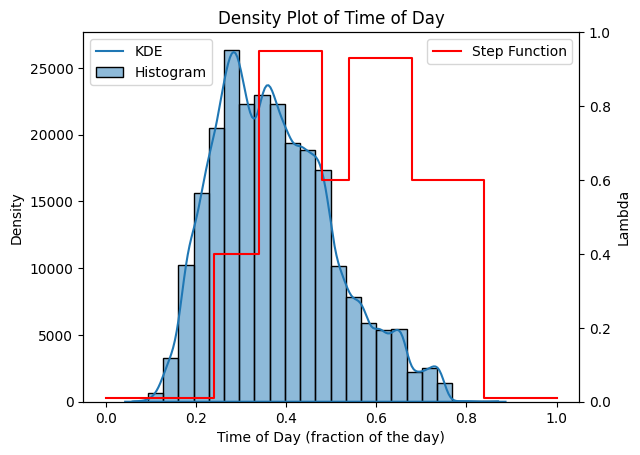

In [97]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is defined elsewhere and contains the necessary data

df2 = df.groupby('case:concept:name')['start:timestamp'].min()

# Step 1: Convert 'start:timestamp' to datetime if not already
df2['start:timestamp'] = pd.to_datetime(df['start:timestamp'])

# Step 2: Extract the time of day as a fraction of the day (0 to 1)
df2['time_of_day'] = df['start:timestamp'].dt.hour / 24 + df['start:timestamp'].dt.minute / 1440

fig, ax1 = plt.subplots()

# Step 3: Plot the density plot of time of day using ax
sns.kdeplot(df2['time_of_day'], bw_adjust=0.5, ax=ax1, label='KDE')
sns.histplot(df2['time_of_day'], bins=24, kde=True, alpha=0.5, label='Histogram', ax=ax1)
ax1.set_xlabel('Time of Day (fraction of the day)')
ax1.set_ylabel('Density')
ax1.set_title('Density Plot of Time of Day')

# Creating a secondary y-axis for the step function
ax2 = ax1.twinx()

# Step function data
step_function = [(60, 0.01), (85, 0.4), (120, 0.95), (135, 0.6), (170, 0.93), (210, 0.6), (250, 0.01)]

# Extracting the lambda values and calculating the mean
lambda_values = [value for _, value in step_function]
mean_lambda = sum(lambda_values) / len(lambda_values)

print(mean_lambda)
start = [0] + [i for i, j in step_function[:-1]]
end = [i for i, j in step_function]
lambda_values = [j for i, j in step_function]

# Preparing data for step plot
x = []
y = []

for i in range(len(start)):
    x.append(start[i])
    y.append(lambda_values[i])
    if i < len(start) - 1:
        x.append(start[i+1])
        y.append(lambda_values[i])

# Adding the last segment
x.append(end[-1])
y.append(lambda_values[-1])

# Normalizing x values
x = [xi/end[-1] for xi in x]

# Plotting the step function on the secondary y-axis
ax2.step(x, y, where='post', color='r', label='Step Function')
ax2.set_ylim(0, 1)  # Adjust as needed
ax2.set_ylabel('Lambda')

# Adding legends for both axes
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.show()